In [1]:
#web scrape
import requests
from bs4 import BeautifulSoup
archive_url = "https://clarksonmsda.org/ml/audio2/data/numbers/5/"

def get_video_links():

	r = requests.get(archive_url)
	soup = BeautifulSoup(r.content,'html.parser')
	links = soup.findAll('a')
	video_links = [archive_url + link['href'] for link in links if link['href'].endswith('wav')]
	return video_links


def download_video_series(video_links):

	for link in video_links:
		file_name = link.split('/')[-1]

		print( "Downloading file:%s"%file_name)
		r = requests.get(link, stream = True)
		with open(file_name, 'wb') as f:
			for chunk in r.iter_content(chunk_size = 1024*1024):
				if chunk:
					f.write(chunk)
		
		print( "%s downloaded!\n"%file_name )

	print ("All videos downloaded!")
	return


video_links = get_video_links()

download_video_series(video_links)
	

	

  

american_f_Alexa_20230406110150.wav downloaded!

american_m_Josh_20230405130012.wav downloaded!

american_m_Josh_20230405130013.wav downloaded!

american_m_Selorm_20230408180030.wav downloaded!

american_m_Shaun_20230406131836.wav downloaded!

american_m_Shaun_20230406131837.wav downloaded!

americans_m_MaximusPowers_20230404125947.wav downloaded!

brazilian_m_Maeva_20230406094754.wav downloaded!

indian_f_Bhavana_20230406090952.wav downloaded!

indian_f_Tejaswini_20230406085222.wav downloaded!

indian_m_AntarikshLodhi_20230410114208.wav downloaded!

indian_m_AntarikshLodhi_20230410114212.wav downloaded!

indian_m_AntarikshLodhi_20230410114219.wav downloaded!

sri-lankan_f_Chethani_20230410101807.wav downloaded!

sri-lankan_f_Dinushani_20230405112026.wav downloaded!

sri-lankan_f_Prathi_20230406133121.wav downloaded!

sri-lankan_f_Thevasha_20230405112448.wav downloaded!

sri-lankan_m_Roshan_20230406205732.wav downloaded!

sri-lankan_m_Roshan_20230406205733.wav downloaded!

sri-lankan_m

In [4]:
import IPython.display as ipd
ipd.Audio('venezuelan_f_Glories_20230406111759.wav')

ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [5]:
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/5"
dir_list = os.listdir(path)
for name in dir_list:
    print(name)

sri-lankan_f_Thevasha_20230405112448.wav
indian_f_Tejaswini_20230406085222.wav
american_m_Josh_20230405130012.wav
american_m_Josh_20230405130013.wav
american_f_Alexa_20230406110150.wav
americans_m_MaximusPowers_20230404125947.wav
sri-lankan_f_Prathi_20230406133121.wav
indian_m_AntarikshLodhi_20230410114208.wav
indian_f_Bhavana_20230406090952.wav
indian_m_AntarikshLodhi_20230410114219.wav
sri-lankan_f_Dinushani_20230405112026.wav
american_m_Selorm_20230408180030.wav
sri-lankan_f_Chethani_20230410101807.wav
indian_m_AntarikshLodhi_20230410114212.wav
.ipynb_checkpoints
sri-lankan_m_Roshan_20230406205734.wav
venezuelan_f_Glories_20230406111759.wav
brazilian_m_Maeva_20230406094754.wav
american_m_Shaun_20230406131837.wav
sri-lankan_m_Roshan_20230406205732.wav
sri-lankan_m_Roshan_20230406205733.wav
american_m_Shaun_20230406131836.wav


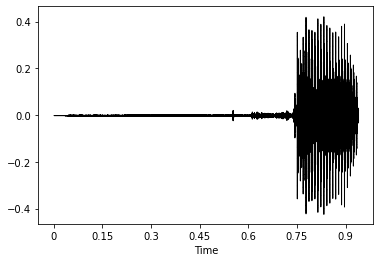

In [7]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/5"
y,sr=librosa.load('audio/5/american_m_Shaun_20230406131836.wav',sr=22050)
librosa.display.waveshow(y,sr=sr,color='black')


audio/5/sri-lankan_f_Thevasha_20230405112448.wav
audio/5/indian_f_Tejaswini_20230406085222.wav
audio/5/american_m_Josh_20230405130012.wav
audio/5/american_m_Josh_20230405130013.wav
audio/5/american_f_Alexa_20230406110150.wav
audio/5/.DS_Store


/var/folders/z8/46_440p905v1pzk4x5tn867h0000gn/T/ipykernel_15217/3307280886.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y,sr=librosa.load(actual,sr=22050)


NoBackendError: 

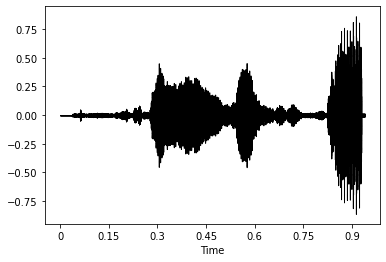

In [3]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/5"
dir_list = os.listdir(path)
for name in range(0,len(dir_list)):
    actual='audio/5/'+dir_list[name]
    print(actual)
    y,sr=librosa.load(actual,sr=22050)
    librosa.display.waveshow(y,sr=sr,color='black')



In [8]:
dir_list[1]
len(y)

20698

In [9]:
D=librosa.stft(y)
s_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)
s_db.shape


(1025, 41)

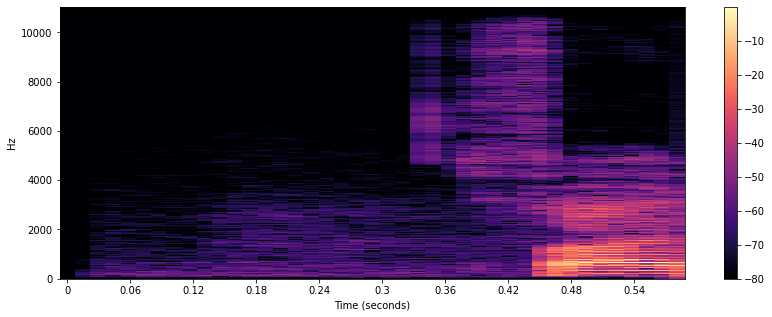

In [10]:
plt.figure(figsize=(14,5))
img=librosa.display.specshow(s_db,sr=sr,x_axis='s',y_axis='linear',hop_length=320)
plt.colorbar()

In [11]:
S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,)
s_db_mel=librosa.amplitude_to_db(S, ref=np.max)

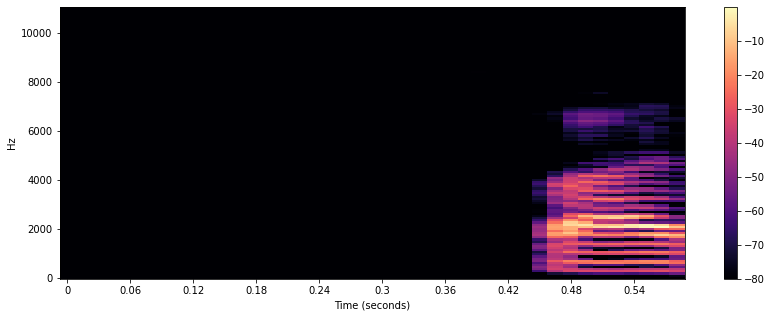

In [12]:
plt.figure(figsize=(14,5))
img=librosa.display.specshow(s_db_mel,sr=sr,x_axis='s',y_axis='linear',hop_length=320)
plt.colorbar()

In [15]:
s_db_mel.shape

(128, 41)

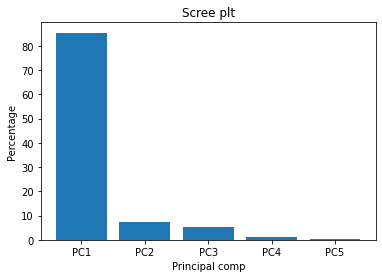

In [14]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(s_db_mel)
pca_data = pca.transform(s_db_mel)

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()